In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

c:\users\jkalpokas\projects\python-enviroments\37aml\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [61]:
train_df = pd.read_csv('train.csv')
train_df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# keyword 222 classes. 
# location - 3500

In [32]:
train_df.shape

(7613, 4)

In [37]:
# clean location

In [40]:
train_df.text.sample(19).values[1]

"SF Asian Women's Shelter crisis line (415) 751-0880. Emergency shelter/support services 4 non-English speaking Asian women &amp; children."

In [41]:
train_df.text.sample(19).values[1]

'A Warcraft 3-inspired mode is likely coming to Heroes of the Storm http://t.co/wz55NBYAO3 http://t.co/L7pMDmeJs1 http://t.co/mDP2nI1pQU'

In [ ]:
# how many links in the text row
# is phone number icluded
# user reference @
# hashtag referencenes
# entities extraction using pretrained models
# 

In [45]:
train_df.text.sample(19).values[1]

'Couple storms near Guthrie OK. Leaving Norman for an evening lightning op. #okwx http://t.co/HcwrK81p71'

In [50]:
train_df['hashtags'] = train_df.text.map(lambda x : [i for i in x.split(' ') if i.strip().startswith('#')])

In [53]:
import gensim

In [54]:
import gensim.downloader as api
# https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html#
# https://medium.com/@SAPCAI/glove-and-fasttext-two-popular-word-vector-models-in-nlp-c9dc051a3b0

In [55]:
model = api.load("glove-wiki-gigaword-50")

loading projection weights from C:\Users\jkalpokas/gensim-data\glove-wiki-gigaword-50\glove-wiki-gigaword-50.gz
loaded (400000, 50) matrix from C:\Users\jkalpokas/gensim-data\glove-wiki-gigaword-50\glove-wiki-gigaword-50.gz


In [59]:
model.most_similar("city")

[('town', 0.8687878847122192),
 ('downtown', 0.8534142374992371),
 ('where', 0.8525029420852661),
 ('cities', 0.8504900932312012),
 ('area', 0.8322184085845947),
 ('in', 0.8228287100791931),
 ('outside', 0.8224184513092041),
 ('near', 0.8144023418426514),
 ('central', 0.8133049011230469),
 ('nearby', 0.7947686314582825)]

In [ ]:
# xgboost - feature importance

# logistic regression

In [ ]:
# if you have a feature - how to evaluate it and decide that it is a good predictor. Homework. 

In [62]:
train_df.sample(10)

,id,keyword,location,text,target
4936,7031,mayhem,NaN,Slayer Reflects on Low Mayhem Festival Attenda...,0
6585,9430,survivors,"Berlin, NY, DC, Malibu",@FedPorn I feel your pain. Survivors will look...,1
5403,7712,panicking,Near Warrington,You certainly are @Ian_Bartlett! Great to see ...,0
224,318,annihilated,NaN,@violentfeminazi I guess that's ok for Armenia...,1
7471,10688,wreck,1/10 Taron squad,Season 3 of New Girl was such a emotional trai...,0
5423,7739,panicking,South Florida,People are finally panicking about cable TV ht...,0
523,755,avalanche,Ireland,A little piece I wrote for the Avalanche Desig...,0
5501,7850,quarantined,Korea,Top link: Reddit's new content policy goes int...,0
600,868,bioterror,Across the Atlantic,#BreakingNews http://t.co/gAN14PW9TG FedEx no ...,0
2763,3969,devastation,"Las Vegas, Nevada",We haven't seen the devastation from the 2014 ...,0


In [ ]:
# vectorizer 
# what is a disaster, how many disasters there are : fire, quake, shooting
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [5]:
test_df = pd.read_csv('test.csv')
test_df.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head(5)

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


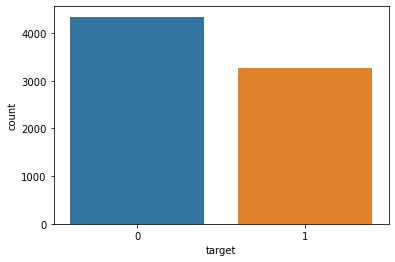

In [7]:
target = train_df['target']
sns.countplot(target)
train_df.drop(['target'], inplace =True,axis =1)

In [8]:
def concat_df(train_df, test_df):
    # Returns a concatenated df of training and test set on axis 0
    return pd.concat([train_df, test_df], sort=True).reset_index(drop=True)
df_all = concat_df(train_df, test_df)
print(train_df.shape)
print(test_df.shape)
print(df_all.shape)
df_all.head()

(7613, 4)
(3263, 4)
(10876, 4)


,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


In [9]:
features = ['keyword','location']
for feat in features : 
    print("The number of missing values in "+ str(feat)+" is "+str(df_all[feat].isnull().sum())+ " for the combined dataset")
    print("The number of missing values in "+ str(feat)+" is "+str(train_df[feat].isnull().sum())+ " for the train dataset")
    print("The number of missing values in "+ str(feat)+" is "+str(test_df[feat].isnull().sum())+ " for the test dataset")

The number of missing values in keyword is 87 for the combined dataset
The number of missing values in keyword is 61 for the train dataset
The number of missing values in keyword is 26 for the test dataset
The number of missing values in location is 3638 for the combined dataset
The number of missing values in location is 2533 for the train dataset
The number of missing values in location is 1105 for the test dataset


In [15]:
train_df.keyword.value_counts(dropna=False)

NaN                      61
fatalities               45
armageddon               42
deluge                   42
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

In [16]:
train_df.location.value_counts(dropna=False)

NaN                            2533
USA                             104
New York                         71
United States                    50
London                           45
                               ... 
Caracas, Venezuela.               1
Near Richmond, VA                 1
nap queen                         1
District 12 - Orange County       1
 Baku & Erzurum                   1
Name: location, Length: 3342, dtype: int64

In [19]:
# To check if there are any keywords which are missing in the train set but present in the test set
keyw_train = train_df['keyword'].unique()
keyw_test = test_df['keyword'].unique()
print(set(keyw_train)==set(keyw_test))

True


In [22]:
#gemin

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
sentences = train_df['text']
# 80% of total data
train_size = int(7613*0.8)
train_sentences = sentences[:train_size]
train_labels = target[:train_size]

test_sentences = sentences[train_size:]
test_labels = target[train_size:]
# Setting our parameters for the tokenizer (currently using default, we will tune them once we have optimised the rest of the model)
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [66]:
padded

array([[   0,    0,    0, ..., 4635,   90,   41],
       [   0,    0,    0, ..., 6955, 6956, 1405],
       [   0,    0,    0, ..., 1406,   25, 1107],
       ...,
       [   0,    0,    0, ...,    2,    3, 6914],
       [   0,    0,    0, ...,  132, 2049,  317],
       [   0,    0,    0, ...,    2,    3,    1]])

In [26]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 14)                238       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 15        
Total params: 160,253
Trainable params: 160,253
Non-trainable params: 0
_________________________________________________________________


In [27]:
num_epochs = 10
history = model.fit(padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels))

Epoch 1/10
191/191 [==============================] - 1s 3ms/step - loss: 0.6797 - accuracy: 0.5793 - val_loss: 0.6930 - val_accuracy: 0.5345
Epoch 2/10
191/191 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.5793 - val_loss: 0.6832 - val_accuracy: 0.5345
Epoch 3/10
191/191 [==============================] - 1s 3ms/step - loss: 0.6424 - accuracy: 0.6002 - val_loss: 0.6387 - val_accuracy: 0.6021
Epoch 4/10
191/191 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.7292 - val_loss: 0.5896 - val_accuracy: 0.7045
Epoch 5/10
191/191 [==============================] - 1s 3ms/step - loss: 0.5033 - accuracy: 0.7943 - val_loss: 0.5263 - val_accuracy: 0.7722
Epoch 6/10
191/191 [==============================] - 1s 3ms/step - loss: 0.4305 - accuracy: 0.8268 - val_loss: 0.4942 - val_accuracy: 0.7800
Epoch 7/10
191/191 [==============================] - 1s 3ms/step - loss: 0.3763 - accuracy: 0.8529 - val_loss: 0.4728 - val_accuracy: 0.7840
Epoch 

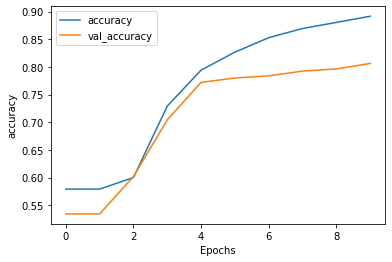

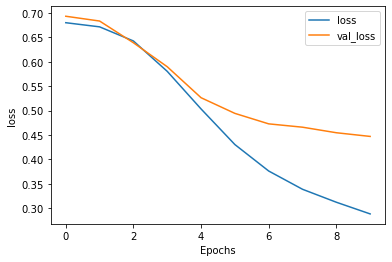

In [28]:
# Analyzing model performance in an accuracy vs epoch graph
import matplotlib.pyplot as plt
def plot(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot(history, "accuracy")
plot(history, 'loss')

In [29]:
tokenizer_1 = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer_1.fit_on_texts(train_df['text'])
word_index = tokenizer_1.word_index
sequences = tokenizer_1.texts_to_sequences(train_df['text'])
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

true_test_sentences = test_df['text']
testing_sequences = tokenizer_1.texts_to_sequences(true_test_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_2.summary()
num_epochs = 10
history = model_2.fit(padded, target, epochs=num_epochs, verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
238/238 - 0s - loss: 0.6805 - accuracy: 0.5701
Epoch 2/10
238/238 - 1s - loss: 0.6497 - accuracy: 0.5877
Epoch 3/10
238/238 - 0s - loss: 0.5661 - accuracy: 0.7466
Epoch 4/10
238/238 - 0s - loss: 0.4645 - accuracy: 0.8114
Epoch 5/10
238

<AxesSubplot:ylabel='Frequency'>

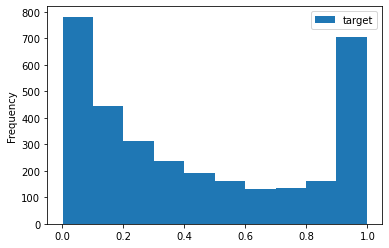

In [30]:
# testing data
output = model_2.predict(testing_padded)
pred_plot =  pd.DataFrame(output, columns=['target'])
pred_plot.plot.hist()

In [31]:
final_output = []
for val in pred_plot.target:
    if val > 0.5:
        final_output.append(1)
    else:
        final_output.append(0)

In [62]:
sample_submission['target'] = final_output
# submission['id'] = test['id']
sample_submission.to_csv("real_or_not_tensorflow_submission.csv", index=False)
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
